**Prompt:** imagine that a product manager (PM) presents you with a data set that includes observations of 50,000 users' behaviors for 20 product features in a mobile application. A subset of 2000 users have given a rating of their satisfaction with the product on a 5-point ordinal scale. Among the 20 feature usage observations, 18 of the variables are binary (usage of the feautre or not) while 2 are continuous (number of sessions and total time in the application by the user during the observation). Finally, there is a variable with assignment of users into three groups labeled "casual" users, "professiona" users, and "disinterested" users.

1. What else would you want to know about the dataset?

In [ ]:
# is this across all user groups (countries, etc.)?
# when was this collected?
# how was this collected? was this 2000 a random sample? in-app pop-up survey?
# are there any missing data?
# what are the 20 features being tracked? why those 20 features?

2. What steps would you take to determine the quality of the data?

In [ ]:
# i would check for N/As
# i would check for duplicate records
# i would check for the data distribution/descriptive statistics

### Loading Dataset

In [2]:
#load the datasets statistics-dat1.csv and statistics-dat2.csv from https://quantuxbook.com/data

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df_1 = pd.read_csv('/content/drive/MyDrive/Quant UXR/statistics-dat1.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/Quant UXR/statistics-dat2.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#check if mounted well

df_1.head(10)
df_2.head(10)


,v1,v2
0,2.059154,-1.434435
1,0.750002,-0.245632
2,1.654007,-4.676168
3,-2.431307,-1.098460
4,0.837735,-0.509512
5,1.671720,-1.965205
6,1.324653,-1.131460
7,-2.290697,-1.621004
8,-2.504378,-0.414381
9,-0.103401,-2.262411


###Checking quality of data

In [6]:
#check for NAs

missing_values_1 = df_1.isnull().sum()
print(missing_values_1)
#no missing values for df1

missing_values_2 = df_2.isnull().sum()
print(missing_values_2)
#no missing values for df2

v1    0
v2    0
dtype: int64
v1    0
v2    0
dtype: int64


In [8]:
#check for duplicate rows

duplicate_rows_1 = df_1.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_1}")
#no duplicate rows for df1

duplicate_rows_2 = df_2.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows_2}")
#no duplicate rows for df2

Number of duplicate rows: 0
Number of duplicate rows: 0


###In each dataset there are two variables, v1 and v2. As far you can tell from statistical analysis, are they good observations? Be sure to plot them.

In [11]:
#checking the descriptive statistics

desc_stats_1 = df_1.describe()
print("Descriptive Statistics for df_1:")
print(desc_stats_1)

desc_stats_2 = df_2.describe()
print("\nDescriptive Statistics for df_2:")
print(desc_stats_2)

Descriptive Statistics for df_1:
                v1           v2
count  2000.000000  2000.000000
mean     -0.017683    -0.035675
std       2.024525     2.012489
min      -5.881963    -6.650633
25%      -1.439461    -1.403458
50%       0.033637    -0.078565
75%       1.341547     1.349543
max       6.337519     6.870648

Descriptive Statistics for df_2:
                v1           v2
count  2000.000000  2000.000000
mean     -0.012886     0.039718
std       1.996118     2.370907
min      -6.604218    -6.179630
25%      -1.427085    -1.900290
50%       0.035143     0.083116
75%       1.373675     1.993470
max       6.499826     6.130308


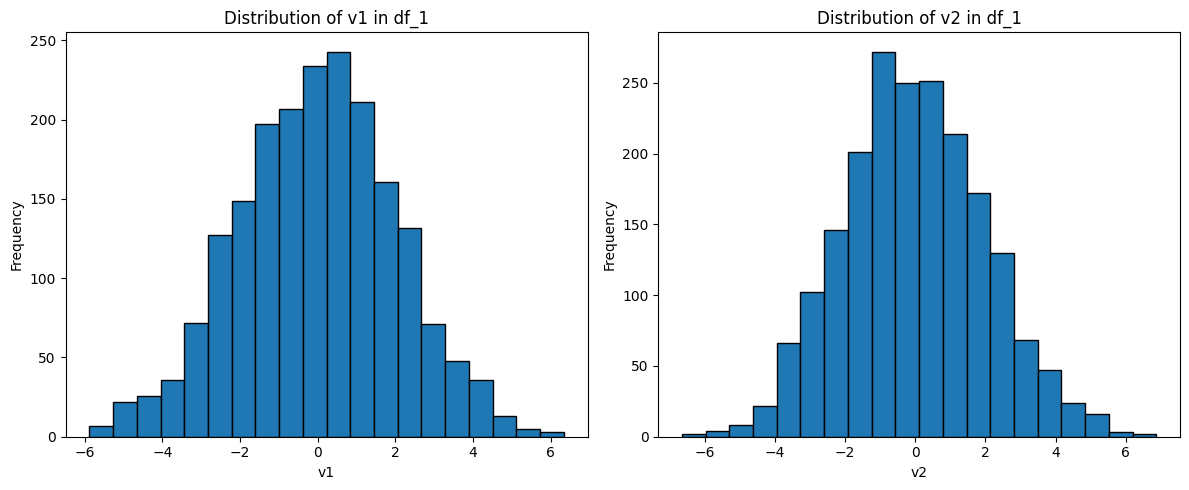

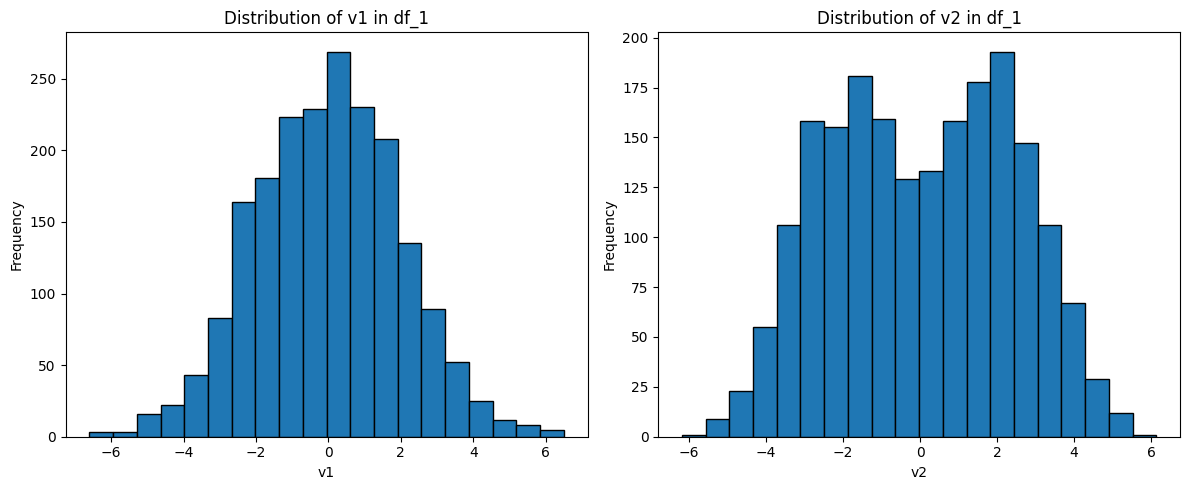

In [15]:
# plotting values

import matplotlib.pyplot as plt

# Create histograms for df_1
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for v1
plt.hist(df_1['v1'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of v1 in df_1')
plt.xlabel('v1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Create a subplot for v2
plt.hist(df_1['v2'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of v2 in df_1')
plt.xlabel('v2')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot spacing
plt.show()

# Create histograms for df_2
plt.figure(figsize=(12, 5))  # Adjust figure size if needed

plt.subplot(1, 2, 1)  # Create a subplot for v1
plt.hist(df_2['v1'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of v1 in df_1')
plt.xlabel('v1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Create a subplot for v2
plt.hist(df_2['v2'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of v2 in df_1')
plt.xlabel('v2')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust subplot spacing
plt.show()

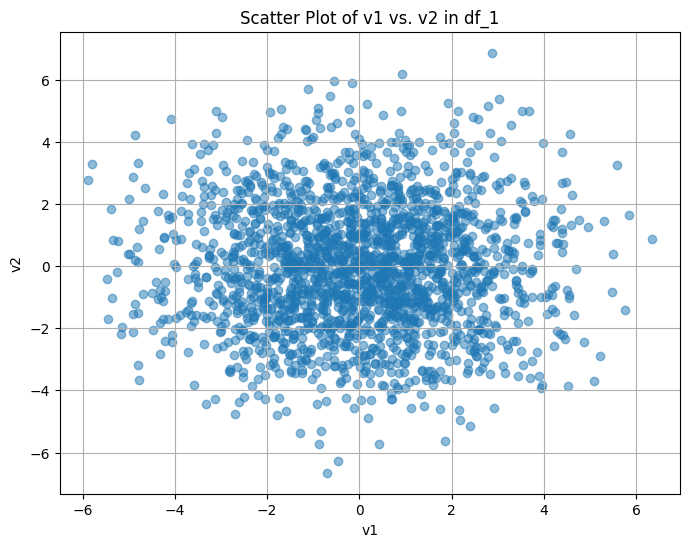

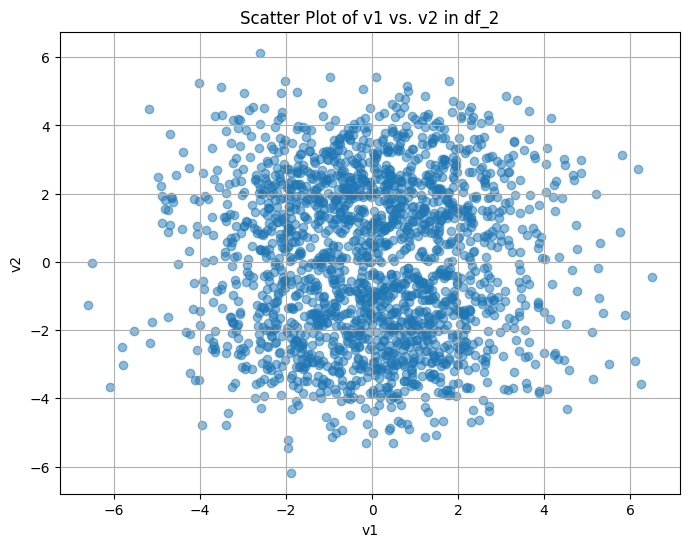

In [14]:
# Create a scatter plot for df_1
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df_1['v1'], df_1['v2'], alpha=0.5)  # alpha controls transparency
plt.title('Scatter Plot of v1 vs. v2 in df_1')
plt.xlabel('v1')
plt.ylabel('v2')
plt.grid(True)  # Add a grid for better visualization
plt.show()

# Create a scatter plot for df_2 (similar to df_1)
plt.figure(figsize=(8, 6))
plt.scatter(df_2['v1'], df_2['v2'], alpha=0.5)
plt.title('Scatter Plot of v1 vs. v2 in df_2')
plt.xlabel('v1')
plt.ylabel('v2')
plt.grid(True)
plt.show()

###In each dataset, is there a statistically significant difference between v1 and v2?



In [ ]:
#let's do a t-test because both variables are continous and we want to see the DIFFERENCE BETWEEN MEANS
#we're not looking at correlation - correlation would be pearson's correlation
#use a t-test when you want to determine if there is a statistically signficant difference in the means of two groups or variables
#use pearson's correlation when you want to measure the strength and direction of a linear relationship between two continous variables

In [18]:
import scipy.stats as stats

t_statistic_1, p_value_1 = stats.ttest_ind(df_1['v1'], df_1['v2'])
print("t-statistic for df_1:", t_statistic_1)
print("p-value for df_1:", p_value_1)

t_statistic_2, p_value_2 = stats.ttest_ind(df_2['v1'], df_2['v2'])
print("t-statistic for df_2:", t_statistic_2)
print("p-value for df_2:", p_value_2)

#interpretation
#null hypothesis (h0): there is no significant difference between v1 and v2
#alt hypothesis (h1): there is a significant difference between v1 and v2
#t-statistic: the difference between the means of v1 and v2, standardized by the variability within each group
#p-value: probability of observing the data if there was no actual difference in the means of v1 and v2

#t-statistic for df_1: 0.28186108625954037
#p-value for df_1: 0.77806461726755
#but p is above 0.05, so we fail to reject the null hypothesis (that there is no significant difference between the means of v1 and v2 in df_1).

#t-statistic for df_2: -0.7590422380383209
#p-value for df_2: 0.44787203798386155
#but p is above 0.05, so we fail to reject the null hypothesis (that there is no significant difference between the means of v1 and v2 in df_1).

t-statistic for df_1: 0.28186108625954037
p-value for df_1: 0.77806461726755
t-statistic for df_2: -0.7590422380383209
p-value for df_2: 0.44787203798386155
